# **Projeto de Bioinformática - Descoberta Computacional de Medicamentos [Parte 5] Comparando Regressores**

Juan Oliveira

Na **Parte 5**, compararemos vários algoritmos de ML para construir modelos de regressão de inibidores da VHC.




## **1. Importar bibliotecas**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # Importando o módulo drive do pacote google.colab para montar o Google Drive

proj_path = '/content/gdrive/MyDrive/Colab Notebooks/' # Especificando uma variável de caminho (caminho do projeto)

file_name6='VHC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv' # Nome do arquivo CSV a ser lido
df = pd.read_csv(proj_path + file_name6) # Lendo o arquivo CSV e armazenando os dados em um DataFrame chamado df
##df = df.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class'])
df

Mounted at /content/gdrive


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.28
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.66
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.66
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.38
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.79
568,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.74
569,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.70
570,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.32


In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50


## **3. Pré-processamento de dados**

In [7]:
# Examine a dimensão X
X.shape

(572, 881)

In [8]:
# Remova recursos de baixa variação
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(572, 199)

In [9]:
# Execute a divisão de dados usando a proporção 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## **4. Compare algoritmos de ML**
Aqui iremos comparar mais de 20 modelos de aprendizado de maquina

In [10]:
# Define e constrói o lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None) #Serve para construir o modelo e atribuir o algoritmo de aprendizado de maquina a uma variavel classificadora e entao atribuir as variaveis de treinamento e teste
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:26<00:00,  1.59it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 457, number of used features: 199
[LightGBM] [Info] Start training from score 7.572302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:20<00:00,  2.00it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 457, number of used features: 199
[LightGBM] [Info] Start training from score 7.572302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

No resultado que foi voltado, demonstrou que possui 42 modelos de aorendizado de maquina

In [11]:
# Tabela de desempenho do conjunto de treinamento (subconjunto de 80%)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.78,0.87,0.55,0.07
ExtraTreeRegressor,0.78,0.87,0.55,0.06
ExtraTreesRegressor,0.78,0.87,0.55,0.62
GaussianProcessRegressor,0.78,0.87,0.55,0.20
XGBRegressor,0.78,0.87,0.55,0.19
RandomForestRegressor,0.73,0.85,0.60,0.64
BaggingRegressor,0.70,0.83,0.64,0.08
MLPRegressor,0.67,0.82,0.66,2.07
GradientBoostingRegressor,0.67,0.81,0.67,0.37


Nao sei se esta correto, mas creio eu que o melhor modelo seja o DecisionTreeRegressor.

In [12]:
# Tabela de desempenho do conjunto de teste (subconjunto de 20%)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,31545950682884527425725997431614175239528272001...,-2352110357934372706233862382446039021661344994...,242290758947699989051876513335834048462848.00,0.30
RANSACRegressor,4216734122729844244480.00,-3144056144140673482752.00,88583564024.44,1.77
TransformedTargetRegressor,876386177956429561856.00,-653445834441197486080.00,40384322368.23,0.05
LinearRegression,876386177956429561856.00,-653445834441197486080.00,40384322368.23,0.05
KernelRidge,31.15,-21.48,7.49,0.08
GaussianProcessRegressor,9.15,-5.07,3.89,0.23
LassoLarsCV,4.58,-1.67,2.58,0.10
LassoLars,2.35,-0.00,1.58,0.03
DummyRegressor,2.35,-0.00,1.58,0.05


## **5. Data visualization of model performance**

[(0.0, 1.0)]

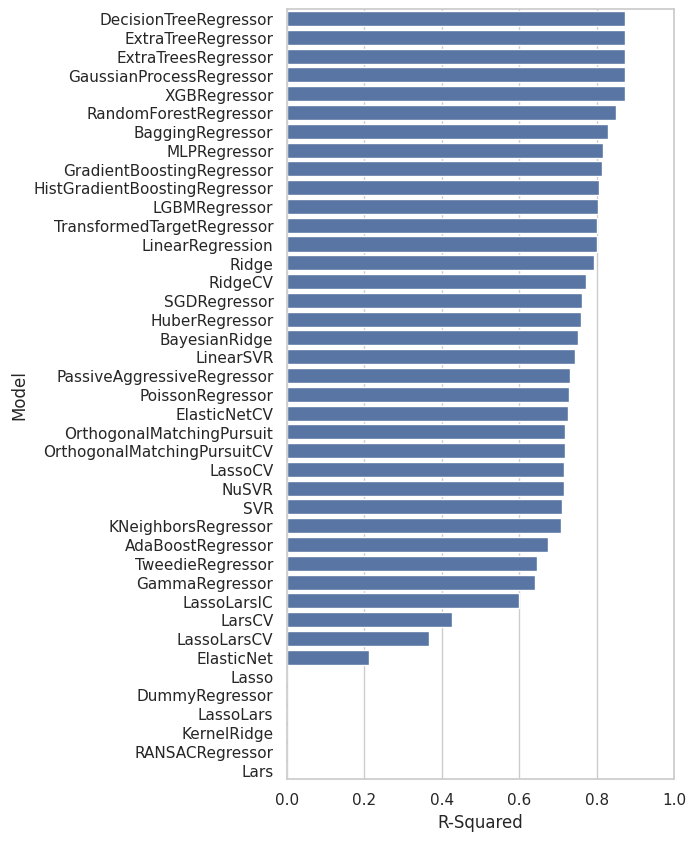

In [13]:
# Gráfico de barras de valores R-quadrados
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

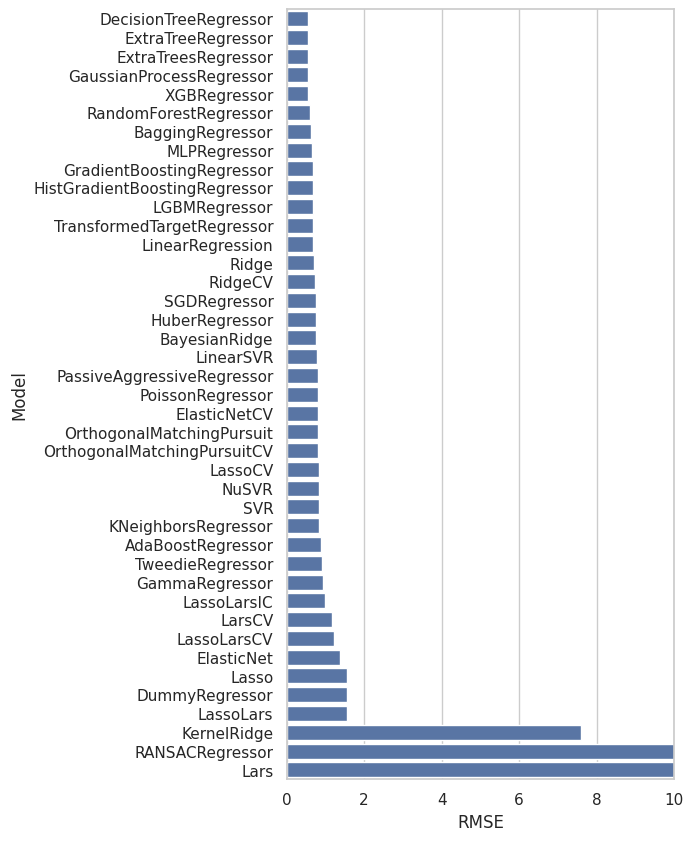

In [14]:
# Gráfico de barras dos valores RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

RMSE é a sigla para "Root Mean Square Error" em inglês, que pode ser traduzido como "Erro Quadrático Médio". É uma métrica estatística usada para medir a discrepância entre os valores previstos por um modelo ou método estatístico e os valores observados ou reais. O RMSE é frequentemente utilizado em problemas de regressão, onde o objetivo é fazer previsões numéricas com base em um conjunto de dados.

O cálculo do RMSE envolve várias etapas:

Para cada ponto de dados no conjunto de dados, calcule a diferença entre o valor previsto pelo modelo e o valor real (erro residual).

Eleve ao quadrado cada um desses erros residuais. Isso é feito para garantir que todos os erros sejam positivos e para dar mais peso a erros maiores.

Calcule a média desses erros quadrados. Isso é feito somando todos os erros quadrados e dividindo pelo número total de pontos de dados.

Finalmente, obtenha a raiz quadrada da média dos erros quadrados para obter o RMSE. A raiz quadrada é aplicada para voltar à mesma escala dos dados originais.

O RMSE fornece uma medida da magnitude média dos erros de previsão. Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados observados, indicando que as previsões estão mais próximas dos valores reais. No entanto, é importante lembrar que o RMSE pondera erros maiores de maneira mais significativa devido ao seu termo quadrático, o que significa que um único erro grande pode elevar substancialmente o valor do RMSE.

O RMSE é uma métrica amplamente utilizada em áreas como aprendizado de máquina, estatísticas e análise de dados para avaliar a qualidade de modelos de previsão e para comparar diferentes modelos em termos de sua capacidade de fazer previsões precisas.

[(0.0, 10.0)]

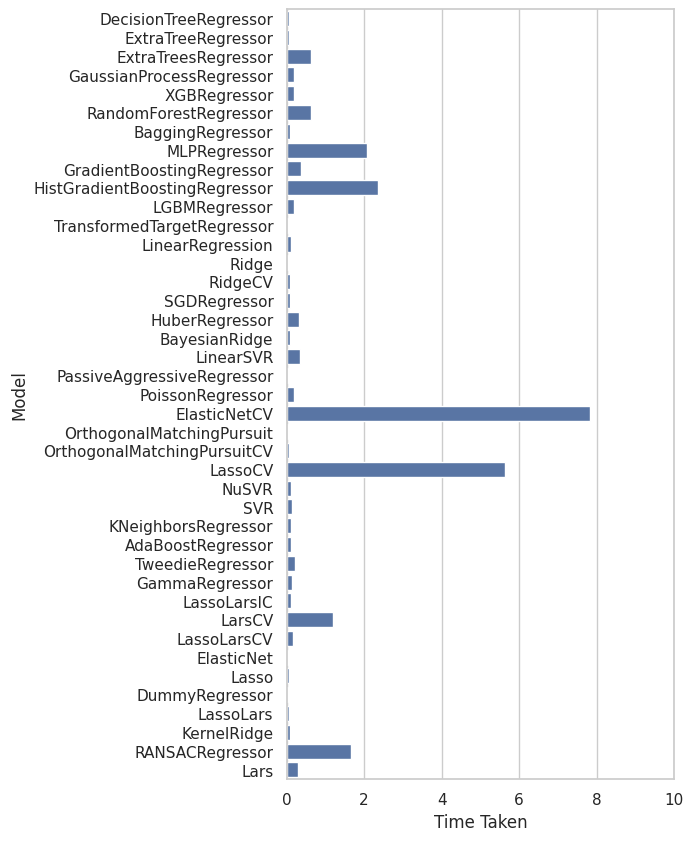

In [15]:
# Gráfico de barras do tempo de cálculo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))